In [7]:
# loading the important libraries 

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [8]:
# read the dataset 

df = pd.read_csv('heart1.csv')
print(df.shape)
df.head()

(960, 13)


,Age,Sex,CP,MHR,BP,SC,FBS,EIA,REG,STD,slope,target,Thal
0,58,0,1,145,160,164,0,0,1,6.2,0,0,3
1,55,1,2,120,104,113,0,0,1,3.5,0,0,3
2,39,0,3,180,120,186,0,1,1,4.2,0,0,3
3,57,1,1,168,110,229,0,0,0,1.0,0,0,3
4,58,0,1,145,95,0,1,0,0,1.1,0,0,3


In [9]:
for cols in df.columns:
    unique_vals = df[cols].unique()
    if len(unique_vals) <= 10:
        print("Feature ", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals)
    else:
        print("Feature ", cols, " has ", len(unique_vals), " unique values")

Feature  Age  has  48  unique values
Feature  Sex  has  2  unique values ---->  [0 1]
Feature  CP  has  4  unique values ---->  [1 2 3 0]
Feature  MHR  has  119  unique values
Feature  BP  has  67  unique values
Feature  SC  has  221  unique values
Feature  FBS  has  2  unique values ---->  [0 1]
Feature  EIA  has  2  unique values ---->  [0 1]
Feature  REG  has  3  unique values ---->  [1 0 2]
Feature  STD  has  53  unique values
Feature  slope  has  3  unique values ---->  [0 1 2]
Feature  target  has  2  unique values ---->  [0 1]
Feature  Thal  has  3  unique values ---->  [3 1 2]


In [10]:
cat_features = ["CP", "REG", "Thal"]

# DATA PRE-PROCESSING

In [11]:
## checking for null values
df.isnull().sum()

Age       0
Sex       0
CP        0
MHR       0
BP        0
SC        0
FBS       0
EIA       0
REG       0
STD       0
slope     0
target    0
Thal      0
dtype: int64

In [12]:
# remove duplicate entries, if any
df.drop_duplicates(inplace = True)
print(df.shape)

(960, 13)


In [13]:
# Convert Catergorical values to numeric representation

df['CP'].replace({0:'A', 1:'B', 2:'C', 3:'D'}, inplace = True)
df['REG'].replace({0:"P", 1:"Q", 2:"R"}, inplace = True)
df.head()

,Age,Sex,CP,MHR,BP,SC,FBS,EIA,REG,STD,slope,target,Thal
0,58,0,B,145,160,164,0,0,Q,6.2,0,0,3
1,55,1,C,120,104,113,0,0,Q,3.5,0,0,3
2,39,0,D,180,120,186,0,1,Q,4.2,0,0,3
3,57,1,B,168,110,229,0,0,P,1.0,0,0,3
4,58,0,B,145,95,0,1,0,P,1.1,0,0,3


In [14]:
# let's investigate the 'thal' feature

df['Thal'].value_counts()

3    422
2    390
1    148
Name: Thal, dtype: int64

In [15]:
df['target'].value_counts()

1    506
0    454
Name: target, dtype: int64

Text(0.5, 1.0, 'Counts Per Target Class on the Dataset')

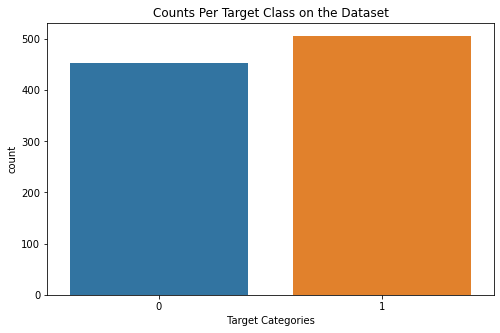

In [16]:
plt.figure(figsize=(8, 5))

plt.subplot()
ax = sns.countplot(df['target'] )
ax.set(ylabel="count", xlabel=" Target Categories ")
plt.title("Counts Per Target Class on the Dataset")


In [17]:
df['Thal'].replace({1:"normal", 2:"fixeddefect", 3:"reversibledefect"}, inplace = True)
df.head()

,Age,Sex,CP,MHR,BP,SC,FBS,EIA,REG,STD,slope,target,Thal
0,58,0,B,145,160,164,0,0,Q,6.2,0,0,reversibledefect
1,55,1,C,120,104,113,0,0,Q,3.5,0,0,reversibledefect
2,39,0,D,180,120,186,0,1,Q,4.2,0,0,reversibledefect
3,57,1,B,168,110,229,0,0,P,1.0,0,0,reversibledefect
4,58,0,B,145,95,0,1,0,P,1.1,0,0,reversibledefect


In [18]:
df = pd.get_dummies(data = df, columns = cat_features)
df.head()

,Age,Sex,MHR,BP,SC,FBS,EIA,STD,slope,target,CP_A,CP_B,CP_C,CP_D,REG_P,REG_Q,REG_R,Thal_fixeddefect,Thal_normal,Thal_reversibledefect
0,58,0,145,160,164,0,0,6.2,0,0,0,1,0,0,0,1,0,0,0,1
1,55,1,120,104,113,0,0,3.5,0,0,0,0,1,0,0,1,0,0,0,1
2,39,0,180,120,186,0,1,4.2,0,0,0,0,0,1,0,1,0,0,0,1
3,57,1,168,110,229,0,0,1.0,0,0,0,1,0,0,1,0,0,0,0,1
4,58,0,145,95,0,1,0,1.1,0,0,0,1,0,0,1,0,0,0,0,1


# Feature Selection

In [19]:
df.describe()

,Age,Sex,MHR,BP,SC,FBS,EIA,STD,slope,target,CP_A,CP_B,CP_C,CP_D,REG_P,REG_Q,REG_R,Thal_fixeddefect,Thal_normal,Thal_reversibledefect
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.0000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,52.603125,0.769792,138.755208,132.258333,200.840625,0.357292,0.432292,0.919167,1.352083,0.527083,0.591667,0.121875,0.2250,0.061458,0.584375,0.211458,0.204167,0.406250,0.154167,0.439583
std,10.987233,0.421186,26.532084,18.453671,106.044930,0.479452,0.495653,1.077559,0.620299,0.499526,0.491782,0.327312,0.4178,0.240294,0.493086,0.408555,0.403301,0.491388,0.361297,0.496595
min,27.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,1.000000,120.000000,120.000000,177.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,140.000000,130.000000,221.500000,0.000000,0.000000,0.650000,1.000000,1.000000,1.000000,0.000000,0.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,1.000000,160.000000,140.000000,266.000000,1.000000,1.000000,1.500000,2.000000,1.000000,1.000000,0.000000,0.0000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,76.000000,1.000000,202.000000,200.000000,603.000000,1.000000,1.000000,6.200000,2.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
X = df.drop(columns = 'target') # X contains the features 
y= df['target']
print(X.shape)
X.head()

(960, 19)


,Age,Sex,MHR,BP,SC,FBS,EIA,STD,slope,CP_A,CP_B,CP_C,CP_D,REG_P,REG_Q,REG_R,Thal_fixeddefect,Thal_normal,Thal_reversibledefect
0,58,0,145,160,164,0,0,6.2,0,0,1,0,0,0,1,0,0,0,1
1,55,1,120,104,113,0,0,3.5,0,0,0,1,0,0,1,0,0,0,1
2,39,0,180,120,186,0,1,4.2,0,0,0,0,1,0,1,0,0,0,1
3,57,1,168,110,229,0,0,1.0,0,0,1,0,0,1,0,0,0,0,1
4,58,0,145,95,0,1,0,1.1,0,0,1,0,0,1,0,0,0,0,1


In [21]:
scale_vars = []

for cols in X.columns:
    if X[cols].max() > 1:
        scale_vars.append(cols)
scale_vars

['Age', 'MHR', 'BP', 'SC', 'STD', 'slope']

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
print(X_train.shape)
print(X_test.shape)

(768, 19)
(192, 19)


Text(0.5, 1.0, 'Counts Per Target Class on the training set')

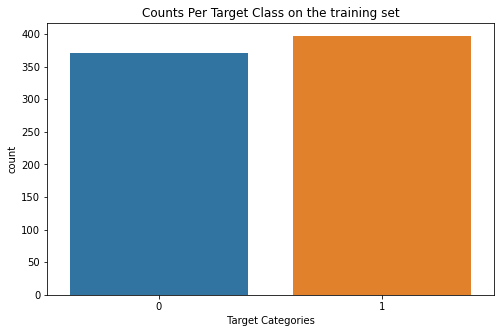

In [26]:
plt.figure(figsize=(8, 5))

plt.subplot()
ax = sns.countplot(y_train )
ax.set(ylabel="count", xlabel=" Target Categories ")
plt.title("Counts Per Target Class on the training set")





Text(0.5, 1.0, 'Counts Per Target Class on the test set')

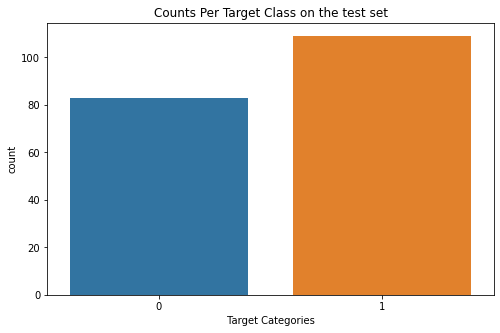

In [27]:
plt.figure(figsize=(8, 5))

plt.subplot()
ax = sns.countplot(y_test )
ax.set(ylabel="count", xlabel=" Target Categories ")
plt.title("Counts Per Target Class on the test set")

In [28]:
scaler.fit(X_train[scale_vars])
X_train[scale_vars] = scaler.transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [29]:
X_test.head()

,Age,Sex,MHR,BP,SC,FBS,EIA,STD,slope,CP_A,CP_B,CP_C,CP_D,REG_P,REG_Q,REG_R,Thal_fixeddefect,Thal_normal,Thal_reversibledefect
197,0.714286,1,0.267606,0.800,0.000000,1,1,0.522727,0.5,1,0,0,0,1,0,0,0,0,1
316,0.326531,0,0.549296,0.600,0.391844,0,0,0.409091,1.0,1,0,0,0,1,0,0,0,0,1
636,0.693878,1,0.556338,0.725,0.000000,1,1,0.375000,0.5,1,0,0,0,1,0,0,1,0,0
444,0.142857,1,0.323944,0.600,0.000000,0,1,0.465909,0.0,1,0,0,0,0,1,0,1,0,0
633,0.714286,1,0.443662,0.680,0.359929,1,1,0.431818,0.5,1,0,0,0,1,0,0,1,0,0


In [30]:
X_train.head()

,Age,Sex,MHR,BP,SC,FBS,EIA,STD,slope,CP_A,CP_B,CP_C,CP_D,REG_P,REG_Q,REG_R,Thal_fixeddefect,Thal_normal,Thal_reversibledefect
822,0.387755,1,0.845070,0.550,0.379433,1,0,0.340909,1.0,1,0,0,0,0,0,1,1,0,0
544,0.714286,1,0.563380,0.650,0.466312,0,1,0.522727,0.5,1,0,0,0,1,0,0,1,0,0
590,0.693878,1,0.492958,0.655,0.269504,1,1,0.409091,0.5,1,0,0,0,0,1,0,1,0,0
440,1.000000,1,0.063380,0.660,0.812057,1,1,0.409091,0.0,1,0,0,0,1,0,0,1,0,0
721,0.632653,1,0.429577,0.480,0.540780,0,1,0.409091,1.0,1,0,0,0,0,0,1,1,0,0


In [31]:
featuresWithZeroVariance = []
for cols in X_train.columns:
    unique_vals = X_train[cols].unique()
    if len(unique_vals) == 1:
        featuresWithZeroVariance.append(cols)
featuresWithZeroVariance

[]

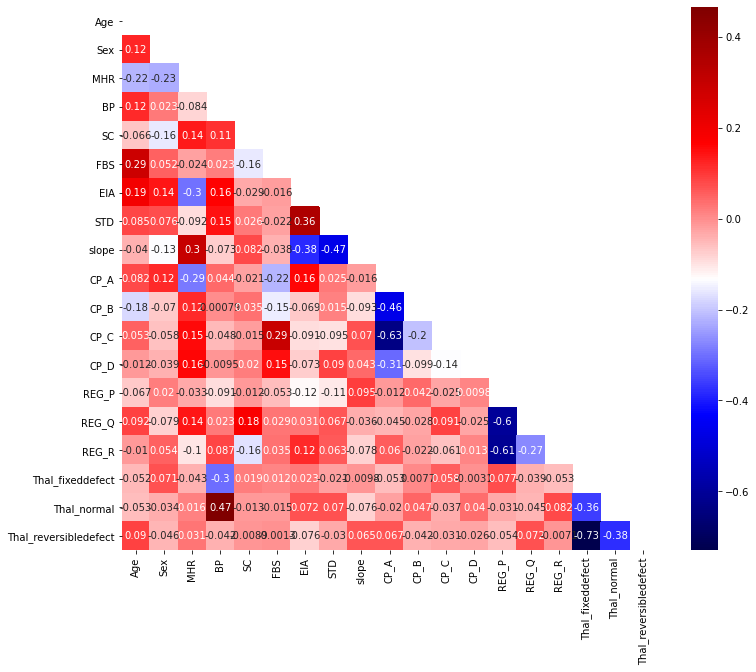

In [32]:
# Pearson's Correlation Coefficient

corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [33]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [34]:
corr_features = correlation(X_train, 0.9) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

0
set()


In [35]:
X_train = X_train.drop(columns = corr_features)
X_test = X_test.drop(columns = corr_features)

print(X_train.shape)
print(X_test.shape)

(768, 19)
(192, 19)


In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
import sklearn
from sklearn import metrics


# Applied Classifier

# Decision Tree

Depth =  2 , Training Accuracy =  0.8776041666666666 , Test Accuracy =  0.84375 , Diff =  3.385416666666663  %
Depth =  3 , Training Accuracy =  0.94921875 , Test Accuracy =  0.96875 , Diff =  1.953125  %
Depth =  4 , Training Accuracy =  0.96484375 , Test Accuracy =  0.9635416666666666 , Diff =  0.13020833333333703  %
Depth =  5 , Training Accuracy =  0.9752604166666666 , Test Accuracy =  0.9010416666666666 , Diff =  7.421875  %
Depth =  6 , Training Accuracy =  0.9869791666666666 , Test Accuracy =  0.9322916666666666 , Diff =  5.46875  %
Depth =  7 , Training Accuracy =  0.9908854166666666 , Test Accuracy =  0.9375 , Diff =  5.3385416666666625  %
Depth =  8 , Training Accuracy =  0.9973958333333334 , Test Accuracy =  0.9375 , Diff =  5.9895833333333375  %
Depth =  9 , Training Accuracy =  1.0 , Test Accuracy =  0.9375 , Diff =  6.25  %
Depth =  10 , Training Accuracy =  1.0 , Test Accuracy =  0.9166666666666666 , Diff =  8.333333333333337  %
Depth =  15 , Training Accuracy =  1.0 , T

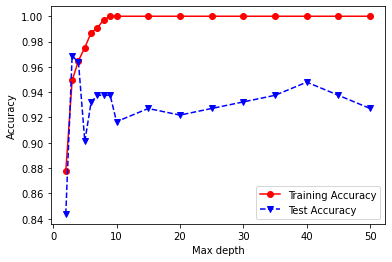

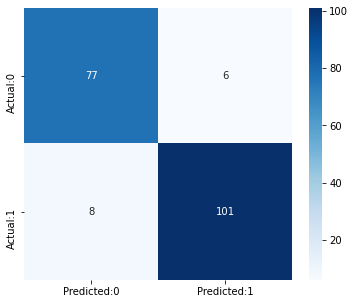

In [37]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_predTest))
print()


sklearn.metrics.accuracy_score(y_test,y_predTest)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predTest)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (6,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues")


print("Classification Report")
print(metrics.classification_report(y_test, y_predTest, digits = 3))

# KNN

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.828125 , Difference =  17.1875 %
K =  5 , Training Accuracy =  0.8580729166666666  Test Accuracy =  0.7916666666666666 , Difference =  6.640625 %
K =  10 , Training Accuracy =  0.7994791666666666  Test Accuracy =  0.8072916666666666 , Difference =  0.78125 %
K =  15 , Training Accuracy =  0.7682291666666666  Test Accuracy =  0.7916666666666666 , Difference =  2.34375 %
K =  20 , Training Accuracy =  0.74609375  Test Accuracy =  0.765625 , Difference =  1.953125 %
K =  25 , Training Accuracy =  0.7252604166666666  Test Accuracy =  0.703125 , Difference =  2.213541666666663 %
K =  30 , Training Accuracy =  0.70703125  Test Accuracy =  0.6875 , Difference =  1.953125 %
Confusion Matrix for the Test Case
[[67 16]
 [44 65]]

Classification Report
              precision    recall  f1-score   support

           0      0.604     0.807     0.691        83
           1      0.802     0.596     0.684       109

    accuracy                  

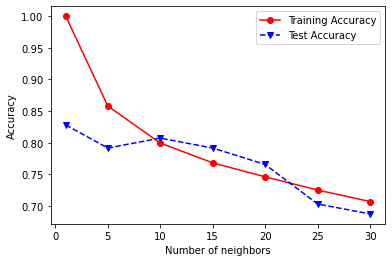

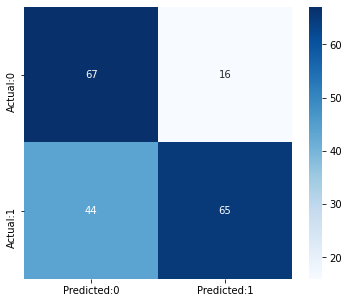

In [38]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1
    
    
 
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_predTest))
print()


sklearn.metrics.accuracy_score(y_test,y_predTest)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predTest)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (6,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues")


print("Classification Report")
print(metrics.classification_report(y_test, y_predTest, digits = 3))


# Logistic Regression

Logistic Regression with no regularization
Train Accuracy:  0.9440104166666666
Test Accuracy:  0.953125

Confusion Matrix for the Test Case
[[ 79   4]
 [  5 104]]

Classification Report
              precision    recall  f1-score   support

           0      0.940     0.952     0.946        83
           1      0.963     0.954     0.959       109

    accuracy                          0.953       192
   macro avg      0.952     0.953     0.952       192
weighted avg      0.953     0.953     0.953       192

Logistic Regression with L2 regularization
Train Accuracy:  0.9166666666666666
Test Accuracy:  0.9270833333333334
Confusion Matrix for the Test Case
[[ 76   7]
 [  7 102]]

Classification Report
              precision    recall  f1-score   support

           0      0.916     0.916     0.916        83
           1      0.936     0.936     0.936       109

    accuracy                          0.927       192
   macro avg      0.926     0.926     0.926       192
weighted avg      0.

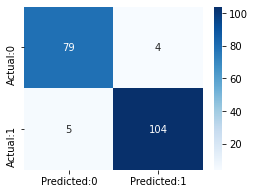

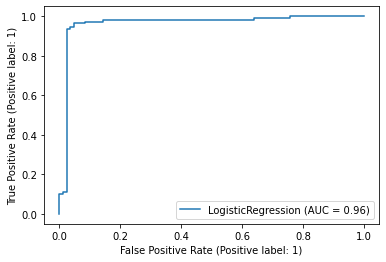

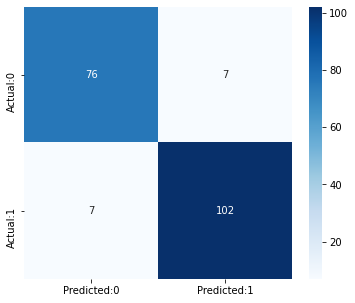

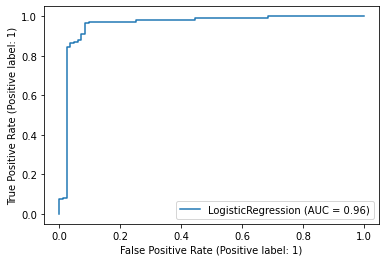

In [39]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
sklearn.metrics.accuracy_score(y_test,y_pred_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (4,3))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues")
from sklearn.metrics import plot_roc_curve
metrics.plot_roc_curve(clf, X_test, y_test);
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))



clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()


sklearn.metrics.accuracy_score(y_test,y_pred_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (6,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues")


from sklearn.metrics import plot_roc_curve

metrics.plot_roc_curve(clf, X_test, y_test);
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

# Perceptron

Train Accuracy:  0.8841145833333334
Test Accuracy:  0.9166666666666666
Confusion Matrix for the Test Case
[[ 73  10]
 [  6 103]]

Classification Report
              precision    recall  f1-score   support

           0      0.924     0.880     0.901        83
           1      0.912     0.945     0.928       109

    accuracy                          0.917       192
   macro avg      0.918     0.912     0.915       192
weighted avg      0.917     0.917     0.916       192



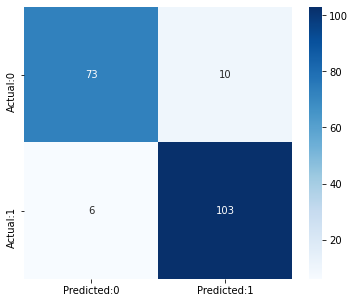

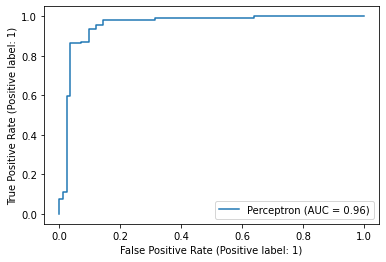

In [40]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))


print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()


sklearn.metrics.accuracy_score(y_test,y_pred_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (6,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues")


print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

from sklearn.metrics import plot_roc_curve

metrics.plot_roc_curve(clf, X_test, y_test);

# Multinomial Naive Bayes

Train Accuracy:  0.6184895833333334
Test Accuracy:  0.6302083333333334
Confusion Matrix for the Test Case
[[45 38]
 [33 76]]

Classification Report
              precision    recall  f1-score   support

           0      0.577     0.542     0.559        83
           1      0.667     0.697     0.682       109

    accuracy                          0.630       192
   macro avg      0.622     0.620     0.620       192
weighted avg      0.628     0.630     0.629       192



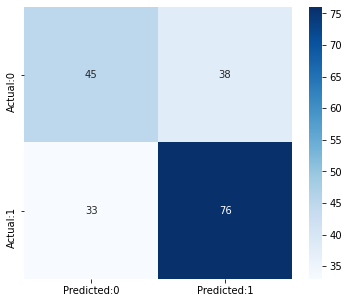

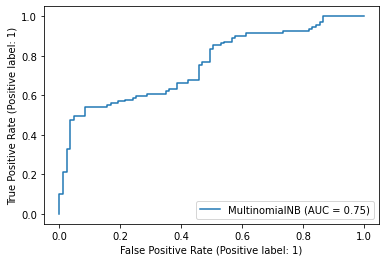

In [41]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()


sklearn.metrics.accuracy_score(y_test,y_pred_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (6,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues")


print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

from sklearn.metrics import plot_roc_curve

metrics.plot_roc_curve(clf, X_test, y_test);



# SVC

Train Accuracy:  0.9166666666666666
Test Accuracy:  0.890625
Confusion Matrix for the Test Case
[[78  5]
 [16 93]]

Classification Report
              precision    recall  f1-score   support

           0      0.830     0.940     0.881        83
           1      0.949     0.853     0.899       109

    accuracy                          0.891       192
   macro avg      0.889     0.896     0.890       192
weighted avg      0.897     0.891     0.891       192



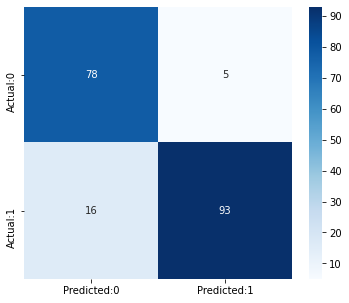

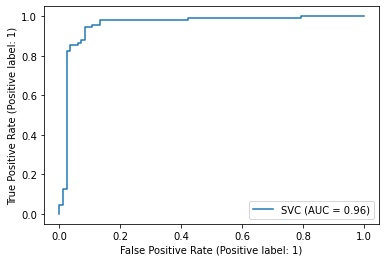

In [42]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()


sklearn.metrics.accuracy_score(y_test,y_pred_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (6,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues")


print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

from sklearn.metrics import plot_roc_curve

metrics.plot_roc_curve(clf, X_test, y_test);



# Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

Mean accuracy:  0.9413886766827944
Train Accuracy:  1.0
Test Accuracy:  0.96875
Confusion Matrix for the Test Case
[[ 81   2]
 [  4 105]]

Classification Report
              precision    recall  f1-score   support

           0      0.953     0.976     0.964        83
           1      0.981     0.963     0.972       109

    accuracy                          0.969       192
   macro avg      0.967     0.970     0.968       192
weighted avg      0.969     0.969     0.969       192



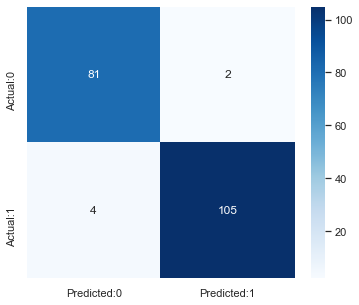

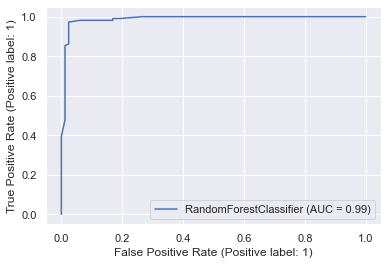

In [44]:
# Random Forest
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
rf_accuracy = np.mean(cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy'))
print('Mean accuracy: ', rf_accuracy)



print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()


sklearn.metrics.accuracy_score(y_test,y_pred_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (6,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues")


print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

from sklearn.metrics import plot_roc_curve

metrics.plot_roc_curve(rf, X_test, y_test);


# Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
    
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    accuracy_score
)


[[ 79   4]
 [  3 106]]
Accuracy=0.9635416666666666
Precision=0.9636363636363636
Recall=0.9724770642201835
Train Accuracy:  0.99609375
Test Accuracy:  0.9635416666666666
Confusion Matrix for the Test Case
[[ 79   4]
 [  3 106]]

Classification Report
              precision    recall  f1-score   support

           0      0.963     0.952     0.958        83
           1      0.964     0.972     0.968       109

    accuracy                          0.964       192
   macro avg      0.964     0.962     0.963       192
weighted avg      0.964     0.964     0.964       192



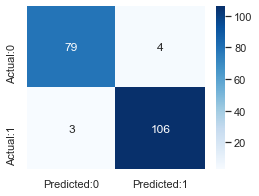

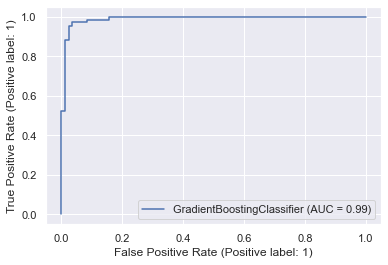

In [46]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_train = gbc.predict(X_train)
y_pred_test = gbc.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))
print("Accuracy=" + str(accuracy_score(y_test, y_pred_test)))
print("Precision=" + str(precision_score(y_test, y_pred_test)))
print("Recall=" + str(recall_score(y_test, y_pred_test)))



print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()


sklearn.metrics.accuracy_score(y_test,y_pred_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (4,3))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues")


print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

from sklearn.metrics import plot_roc_curve

metrics.plot_roc_curve(gbc, X_test, y_test);